# AI Computer Assignment 4 (Machine Learning)
Mohammad Saadati - 
_810198410_

## Introduction
In this project, the aim is to get acquainted with machine learning methods through the Sickit-Learn library.

## Phase 0: EDA and Visualization

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

dataset_df = pd.read_csv("./dataset.csv")
dataset_df 

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.6210,0.029700,G,0.1590,-7.429,Major,0.0382,142.065,0.6070,Jazz
1,FloFilz,Corners,34.0,0.34700,0.729,103703.0,0.5150,0.006920,C,0.1270,-10.147,Major,0.1840,79.969,0.2870,Jazz
2,Bonobo,We Could Forever,51.0,0.01810,0.669,NaN,0.8850,0.880000,G,0.2650,-7.080,Minor,0.0378,NaN,0.6360,Jazz
3,Nils Landgren,A Child Is Born,39.0,0.91800,0.484,228733.0,0.0693,0.000069,F,0.1390,-15.542,Major,0.0346,82.707,0.2060,Jazz
4,Masayoshi Takanaka,Samba Pati,36.0,0.03450,0.473,342867.0,0.8230,0.446000,G,0.3060,-6.625,Major,0.0630,104.694,0.3830,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Wolfgang Amadeus Mozart,"Die Zauberflöte, K. 620: Wie stark ist nicht d...",22.0,0.91100,0.326,368640.0,0.1330,0.000000,G,0.1300,-20.493,Major,0.0557,92.090,0.2060,Classical
29996,New York Philharmonic,"Symphony No. 2 in D Major, Op. 73: II. Adagio ...",26.0,0.96500,0.126,514213.0,0.2040,0.869000,B,0.1060,-16.474,Major,0.0395,82.437,0.0387,Classical
29997,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",54.0,0.97600,0.363,262147.0,0.1150,0.000000,D,0.0992,-17.325,Major,0.0689,NaN,0.2310,Classical
29998,Edvard Grieg,"Peer Gynt-Suite Nr. 1, Op. 46: I. Morning",42.0,0.98500,0.123,259573.0,0.0174,0.906000,E,0.1250,-23.671,Major,0.0408,71.705,0.0352,Classical


### Question 1:
The describe() function returns descriptive statistics for every column of DataFrame.

In [2]:
dataset_df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


The info() function returns a summary of DataFrame including data type and non-null values count of each column and also memory usage.

In [3]:
dataset_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       28506 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       26990 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             27067 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

### Question 2:
In this part first we use two Pandas function (isna and sum) to count number of missing values at each column.

In [4]:
missing_values = dataset_df.isna().sum()/len(dataset_df) * 100
missing_values = pd.DataFrame({'Property': dataset_df.columns, 'Percentage of Missing Values': missing_values})
missing_values.reset_index(inplace=True, drop=True)
print(missing_values)

            Property  Percentage of Missing Values
0        artist_name                      4.980000
1         track_name                      0.000000
2         popularity                      0.000000
3       acousticness                      0.000000
4       danceability                      0.000000
5        duration_ms                     10.033333
6             energy                      0.000000
7   instrumentalness                      0.000000
8                key                      0.000000
9           liveness                      0.000000
10          loudness                      0.000000
11              mode                      0.000000
12       speechiness                      0.000000
13             tempo                      9.776667
14           valence                      0.000000
15       music_genre                      0.000000


# Question 3: ???

In [5]:
numerical_column_df = dataset_df
non_numerical_column_df = dataset_df

for column in dataset_df:
    if dataset_df[column].dtype == "object":
        numerical_column_df = numerical_column_df.drop(columns=[column])
    else:
        non_numerical_column_df = non_numerical_column_df.drop(columns=[column])

counter = 0
colors = ['#98f5ff', '#1cc32f', '#FF4040', '#9a34b5', '#1691a7', '#b5347e', '#e5d700', '#de6722', '#8B4513', '#C1FFC1'
          , '#ae8b0c', '#ff796c']

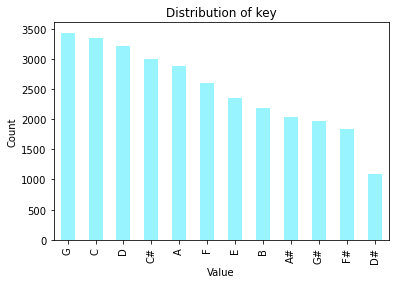

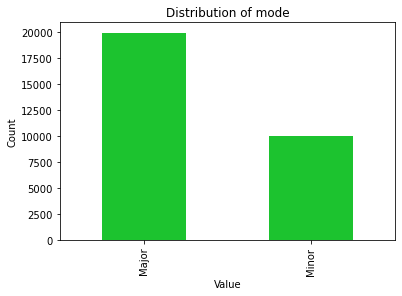

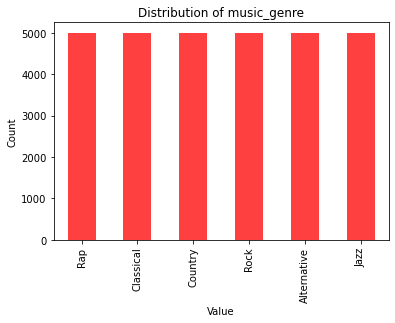

In [6]:
for column in non_numerical_column_df:
    if column != "artist_name" and column != "track_name":
        non_numerical_column_df[column].value_counts().plot.bar(color = colors[counter % 12])
        plt.xlabel("Value") 
        plt.ylabel("Count") 
        plt.title("Distribution of " + column) 
        plt.show()
        counter += 1

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


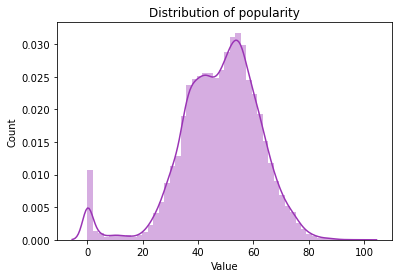

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


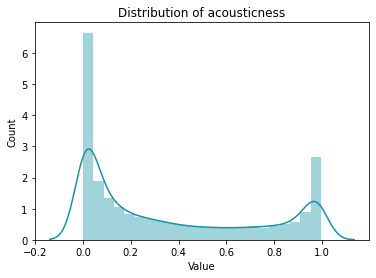

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


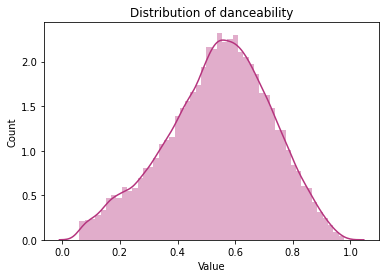

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


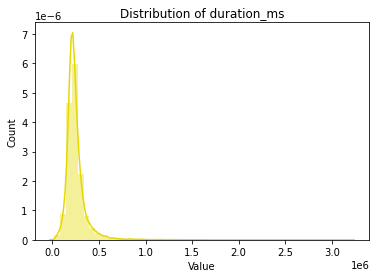

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


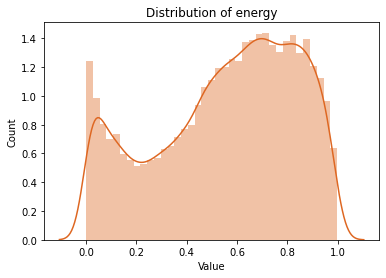

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


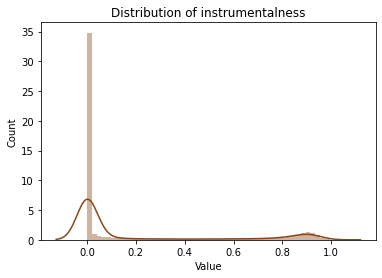

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


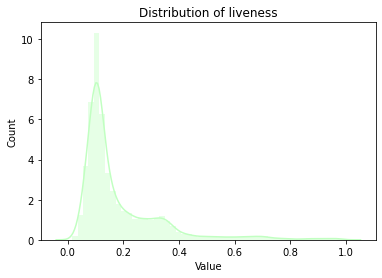

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


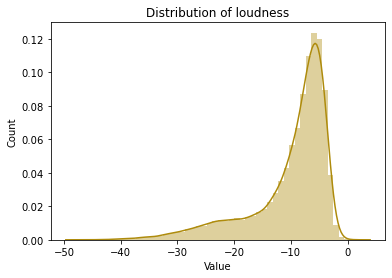

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


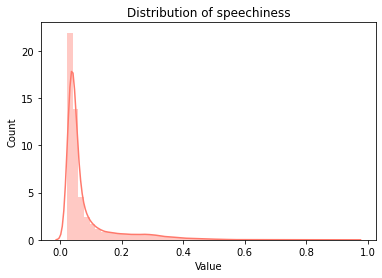

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


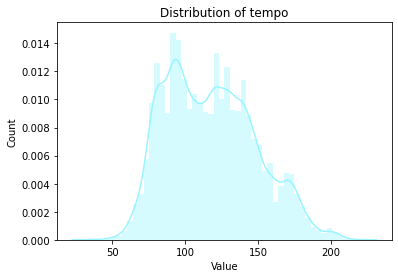

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


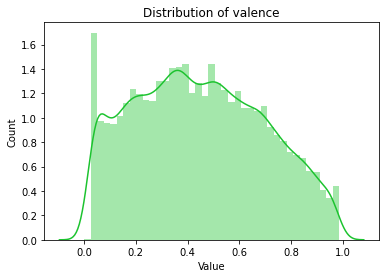

In [7]:
for column in numerical_column_df:
    ax = sns.distplot(numerical_column_df[column], hist=True, color= colors[counter % 12])
    plt.xlabel("Value") 
    plt.ylabel("Count") 
    plt.title("Distribution of " + column) 
    plt.show() 
    counter += 1

## Phase 1: Preprocessing

### Question 1:
Missing values handling methods:
* <b>Dropping Columns:</b> In this approach we drop columns with missing values. This method is advised only when there are enough samples in the data set. The problem with this approach is that we lose useful data which will not give the expected results while predicting the output, but it may be effective when most data in a column is missing.  Removing the data will lead to loss of information which will not give the expected results while predicting the output.

* <b>Replacing with Mean or Median or Mode:</b> In this method we fill missing values with mean/median/mode of the column. This strategy can be applied on an attribute which has numeric data. We can calculate the mean, median or mode of the attribute and replace it with the missing values. The choice to whether use mean or median depends on the domain, outliers influence mean to change a lot but they don't have much influence on median.The problem with using this approach is that we can't use it on categorical data and it may not be always effecient.



### Question 2

In [8]:
nan_cols = ["duration_ms", "tempo"]
print(dataset_df[nan_cols].mean())

nan_cols = ["artist_name", "duration_ms", "tempo"]
print(dataset_df[nan_cols].mode())

duration_ms    246646.049722
tempo             117.559824
dtype: float64
               artist_name  duration_ms    tempo
0  Wolfgang Amadeus Mozart     180000.0  120.012


We decided to replace NaN values in each column with the most frequent data in that column since we don't like to drop one whole row because of a single value missing.

In [9]:
# for column in nan_cols:
#     dataset_df.loc[:,column].fillna(dataset_df[column].mode(), inplace = True)
dataset_df.loc[:,"artist_name"].fillna("Wolfgang Amadeus Mozart", inplace = True)
dataset_df.loc[:,"duration_ms"].fillna(180000.0, inplace = True)
dataset_df.loc[:,"tempo"].fillna(120.012, inplace = True)
    
missing_values = dataset_df.isna().sum()/len(dataset_df) * 100
missing_values = pd.DataFrame({'Property': dataset_df.columns, 'Percentage of Missing Values': missing_values})
missing_values.reset_index(inplace=True, drop=True)
print(missing_values)

            Property  Percentage of Missing Values
0        artist_name                           0.0
1         track_name                           0.0
2         popularity                           0.0
3       acousticness                           0.0
4       danceability                           0.0
5        duration_ms                           0.0
6             energy                           0.0
7   instrumentalness                           0.0
8                key                           0.0
9           liveness                           0.0
10          loudness                           0.0
11              mode                           0.0
12       speechiness                           0.0
13             tempo                           0.0
14           valence                           0.0
15       music_genre                           0.0


### Question 3:
* <b>Normalizing Data:</b> Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.  Normalization change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. Normalization is required only when features have different ranges.
* <b>Standardizing Data:</b> Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). When we compare measurements that have different units Standardizing the features is important. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

# Question 4: ???

The good point of these approaches is that they get all data to the same scale, This may improve learning and may have better effect on some optimization methods. We used Normalization for the above reasons

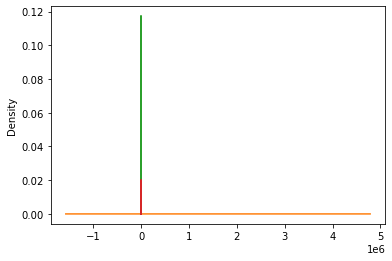

In [10]:
norm_column = ["popularity", "duration_ms", "loudness", "tempo"]

for column in norm_column:
    ax = dataset_df[column].plot.kde()

In [11]:
#normalize
for col in norm_column:
    dataset_df[col] = (dataset_df[col]-dataset_df[col].min())/(dataset_df[col].max()-dataset_df[col].min())
dataset_df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",0.444444,0.00621,0.711,0.085058,0.6210,0.029700,G,0.1590,0.818736,Major,0.0382,0.582310,0.6070,Jazz
1,FloFilz,Corners,0.343434,0.34700,0.729,0.027735,0.5150,0.006920,C,0.1270,0.762565,Major,0.1840,0.246627,0.2870,Jazz
2,Bonobo,We Could Forever,0.515152,0.01810,0.669,0.051728,0.8850,0.880000,G,0.2650,0.825949,Minor,0.0378,0.463094,0.6360,Jazz
3,Nils Landgren,A Child Is Born,0.393939,0.91800,0.484,0.067053,0.0693,0.000069,F,0.1390,0.651071,Major,0.0346,0.261428,0.2060,Jazz
4,Masayoshi Takanaka,Samba Pati,0.363636,0.03450,0.473,0.102945,0.8230,0.446000,G,0.3060,0.835352,Major,0.0630,0.380287,0.3830,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Wolfgang Amadeus Mozart,"Die Zauberflöte, K. 620: Wie stark ist nicht d...",0.222222,0.91100,0.326,0.111050,0.1330,0.000000,G,0.1300,0.548752,Major,0.0557,0.312151,0.2060,Classical
29996,New York Philharmonic,"Symphony No. 2 in D Major, Op. 73: II. Adagio ...",0.262626,0.96500,0.126,0.156829,0.2040,0.869000,B,0.1060,0.631810,Major,0.0395,0.259968,0.0387,Classical
29997,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",0.545455,0.97600,0.363,0.077561,0.1150,0.000000,D,0.0992,0.614223,Major,0.0689,0.463094,0.2310,Classical
29998,Edvard Grieg,"Peer Gynt-Suite Nr. 1, Op. 46: I. Morning",0.424242,0.98500,0.123,0.076751,0.0174,0.906000,E,0.1250,0.483074,Major,0.0408,0.201953,0.0352,Classical


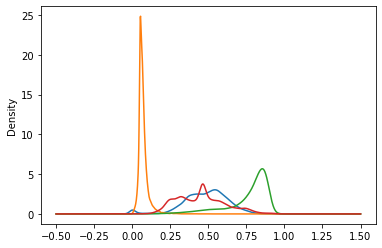

In [12]:
for column in norm_column:
    ax = dataset_df[column].plot.kde()

### Question 5:
There are different ways for handling categirical data.
* <b>Label Encoders:</b> Assigining numbers to each categorical value. 
* <b>One Hot Encoding:</b>  The basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. There are also other ways but here we choose to apply one Hot-Encode to categorical variables.
* <b>Ordinal Encoding:</b> We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.

Label Encoders aren't a good option when we have no particular ordering in our categories. In these cases, we can use One Hot Encoding which takes a lot of memory since it is adding a new column for each new category. We use Ordinal Encoding because its give us better features.

In [13]:
from sklearn.preprocessing import OrdinalEncoder
pd.options.mode.chained_assignment = None  # default='warn'
#numerical_cols = list(dataset_df._get_numeric_data().columns)
#categorical_cols = [x for x in list(dataset_df.columns) if x not in numerical_cols]
categorical_cols = ["key", "mode", "music_genre"] # "artist_name", 
ord_enc = OrdinalEncoder()
dataset_df[categorical_cols] = ord_enc.fit_transform(dataset_df[categorical_cols].astype(str))
dataset_df

# for col in dataset_df:
#     if dataset_df[col].dtypes == 'object':
#         brand_one_hot = pd.get_dummies(dataset_df[col], prefix=col)
#         dataset_df = dataset_df.drop([col], axis = 1)
#         dataset_df = pd.concat([dataset_df, brand_one_hot], axis = 1)
# dataset_df

# from sklearn.preprocessing import OneHotEncoder
# numerical_cols = list(dataset_df._get_numeric_data().columns)
# categorical_cols = [x for x in list(dataset_df.columns) if x not in numerical_cols]
# encoder = OneHotEncoder()
# onehot = encoder.fit_transform(dataset_df[categorical_cols]).toarray()
# encoder_cols = encoder.get_feature_names(categorical_cols)
# categorical_df = pd.DataFrame(onehot,columns = encoder_cols)
# categorical_df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",0.444444,0.00621,0.711,0.085058,0.6210,0.029700,10.0,0.1590,0.818736,0.0,0.0382,0.582310,0.6070,3.0
1,FloFilz,Corners,0.343434,0.34700,0.729,0.027735,0.5150,0.006920,3.0,0.1270,0.762565,0.0,0.1840,0.246627,0.2870,3.0
2,Bonobo,We Could Forever,0.515152,0.01810,0.669,0.051728,0.8850,0.880000,10.0,0.2650,0.825949,1.0,0.0378,0.463094,0.6360,3.0
3,Nils Landgren,A Child Is Born,0.393939,0.91800,0.484,0.067053,0.0693,0.000069,8.0,0.1390,0.651071,0.0,0.0346,0.261428,0.2060,3.0
4,Masayoshi Takanaka,Samba Pati,0.363636,0.03450,0.473,0.102945,0.8230,0.446000,10.0,0.3060,0.835352,0.0,0.0630,0.380287,0.3830,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Wolfgang Amadeus Mozart,"Die Zauberflöte, K. 620: Wie stark ist nicht d...",0.222222,0.91100,0.326,0.111050,0.1330,0.000000,10.0,0.1300,0.548752,0.0,0.0557,0.312151,0.2060,1.0
29996,New York Philharmonic,"Symphony No. 2 in D Major, Op. 73: II. Adagio ...",0.262626,0.96500,0.126,0.156829,0.2040,0.869000,2.0,0.1060,0.631810,0.0,0.0395,0.259968,0.0387,1.0
29997,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",0.545455,0.97600,0.363,0.077561,0.1150,0.000000,5.0,0.0992,0.614223,0.0,0.0689,0.463094,0.2310,1.0
29998,Edvard Grieg,"Peer Gynt-Suite Nr. 1, Op. 46: I. Morning",0.424242,0.98500,0.123,0.076751,0.0174,0.906000,7.0,0.1250,0.483074,0.0,0.0408,0.201953,0.0352,1.0


# Question 6: ???

### Question 7:
mutual_info_regression is used and the feature values and the target of dataset(type) passed to it.

In [16]:
from sklearn.feature_selection import mutual_info_regression
features = ["artist_name", "track_name", "music_genre"]
y = dataset_df['music_genre']
X = dataset_df.copy()
X = X.drop(columns=features, axis = 1)
mir = mutual_info_regression(X, y)
mir = pd.Series(mir)
mir.index = X.columns
mir

popularity          0.499355
acousticness        0.358103
danceability        0.278010
duration_ms         0.100005
energy              0.328939
instrumentalness    0.298365
key                 0.019869
liveness            0.009144
loudness            0.346084
mode                0.036129
speechiness         0.212096
tempo               0.098051
valence             0.137697
dtype: float64

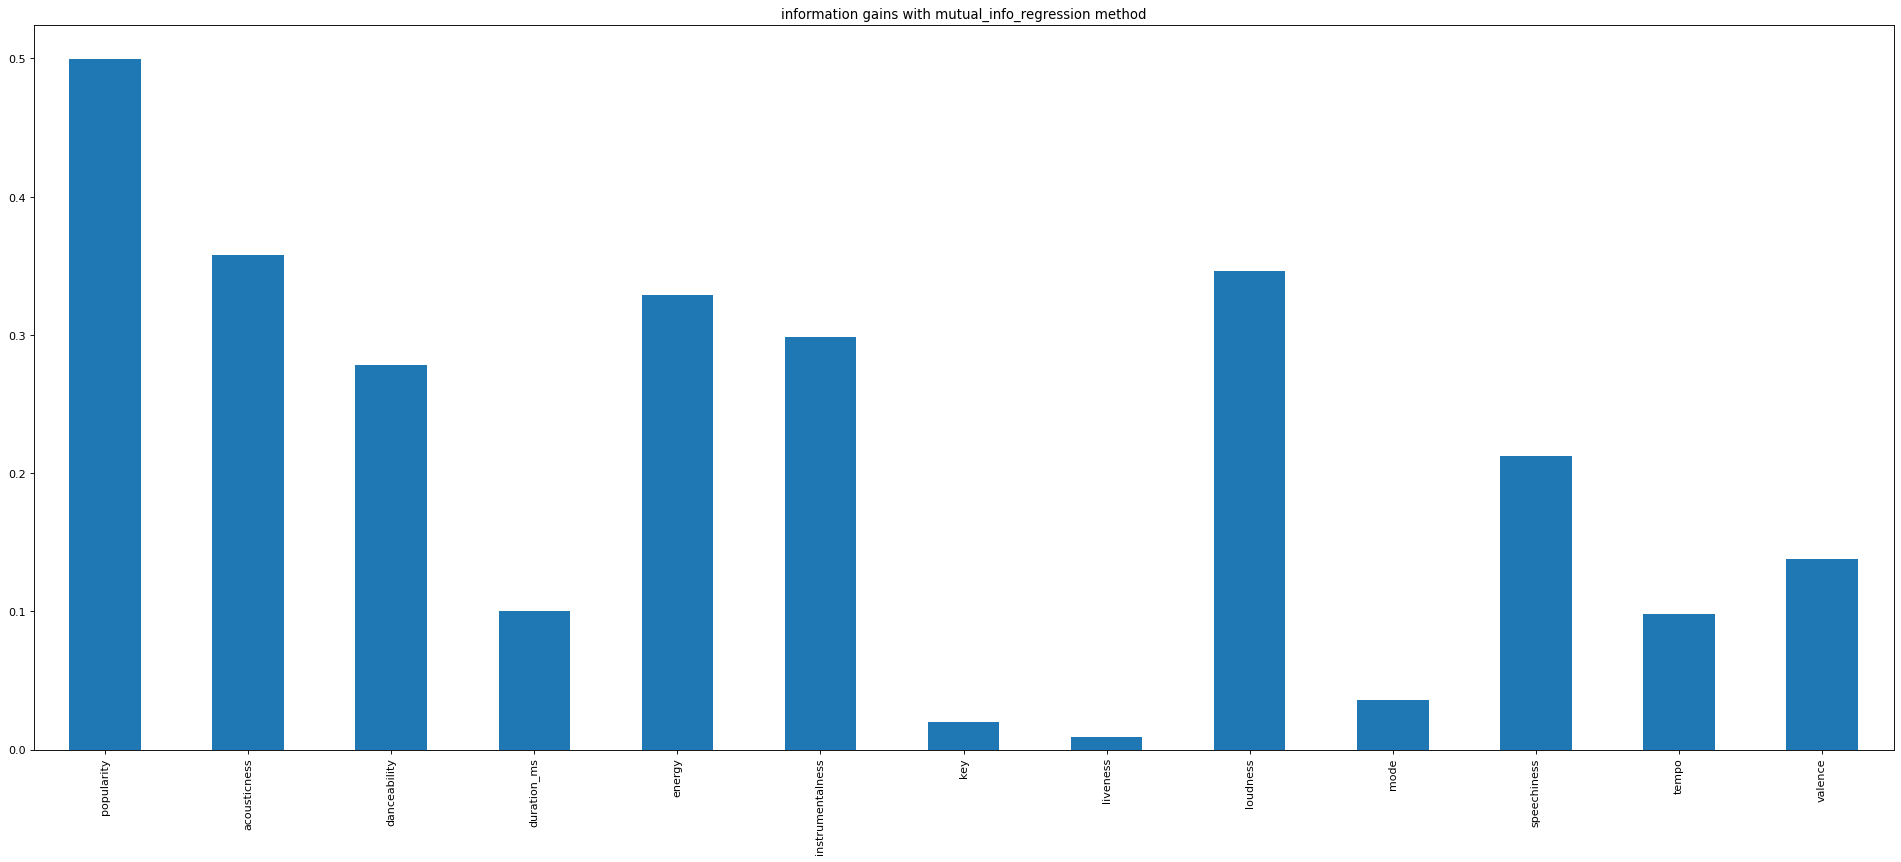

In [17]:
plt.figure(figsize=(30,12), dpi= 80, facecolor='w', edgecolor='k')
mir.plot.bar()
plt.title('information gains with mutual_info_regression method')
plt.show()

if information gain (the values in the bar chart below) is high it means that the corresponding feature can provide more information than the others meaning that it'll help the training procedure more so it's a good idea to keep that feature in the dataset and use it's values in the training. This plot shows that the columns genres are giving us more useful info about the type of each row. We can simply eliminate the other columns since they don't have much gain.

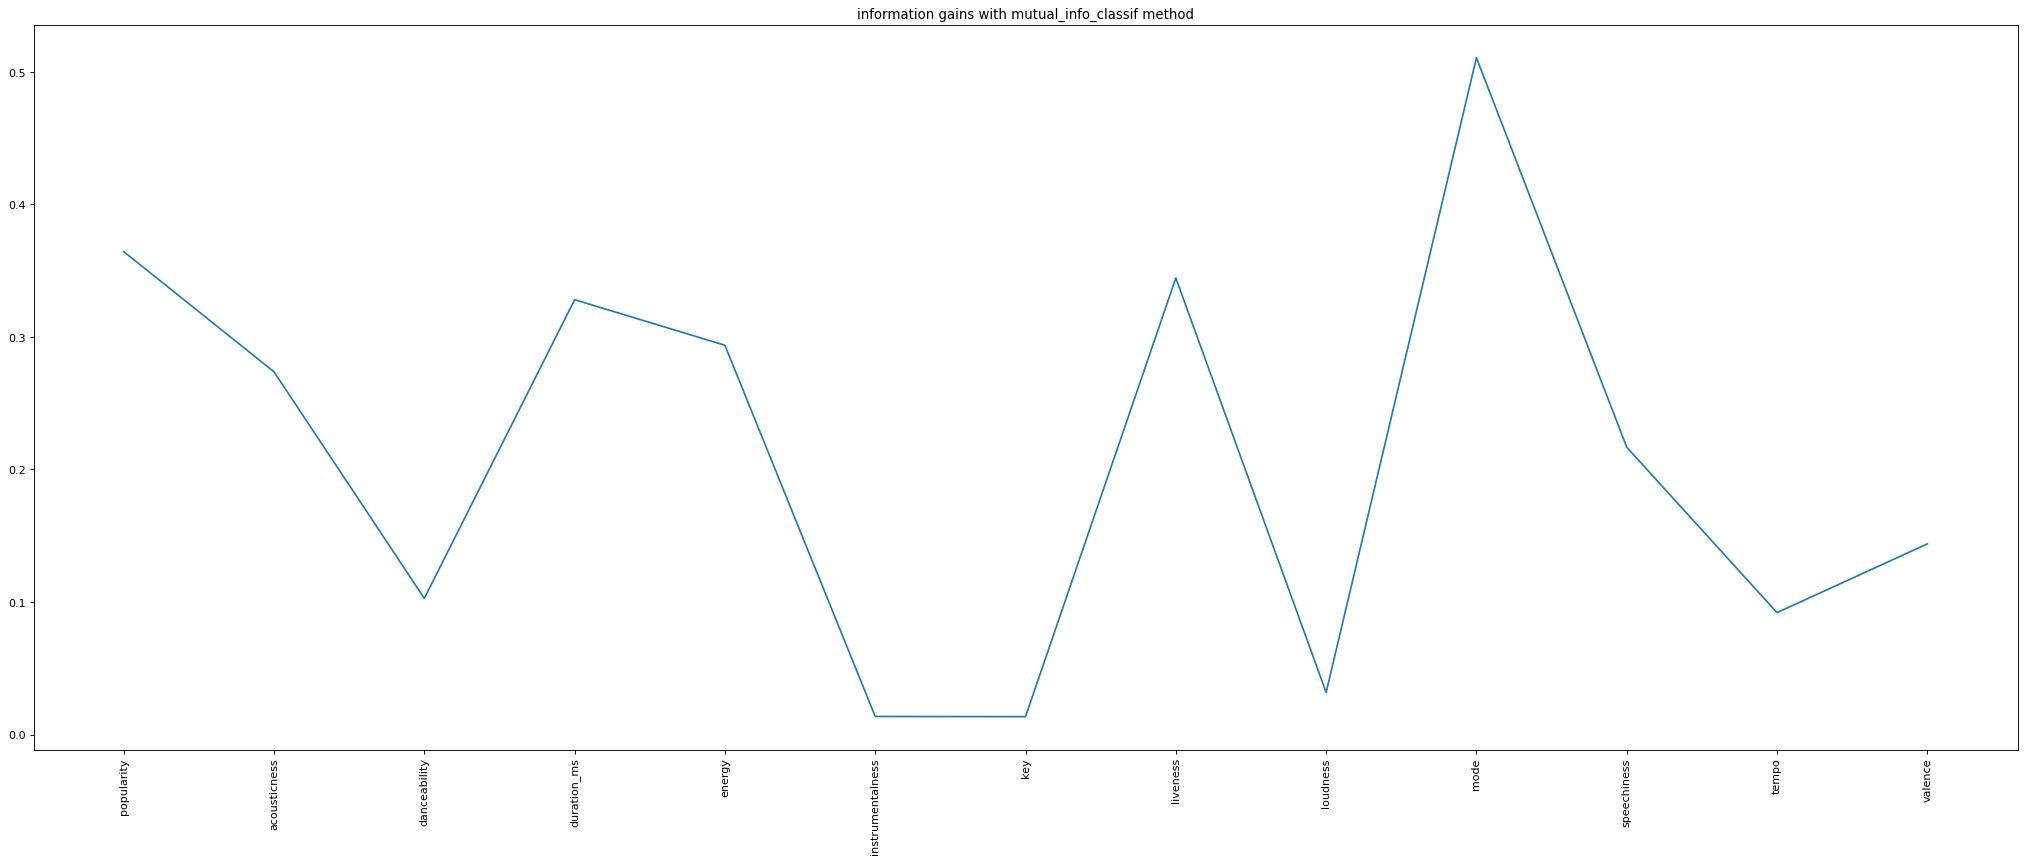

In [18]:
from sklearn.feature_selection import mutual_info_classif
features = ["artist_name", "track_name", "music_genre"]  
information_gains = dict(zip(dataset_df.drop(columns=features).columns, mutual_info_classif(dataset_df.drop(columns=features), dataset_df["music_genre"])))
lists = sorted(information_gains.items())
x_, y_ = zip(*lists)
fig=plt.figure(figsize=(32,12), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x_, y_)
plt.title('information gains with mutual_info_classif method')
plt.xticks(x_, information_gains.keys(), rotation='vertical')
plt.show()

Mutual information is a quantity that measures how much one random variables tells about another. Mutual information can be thought of as the reduction in uncertainty about one random variable given knowledge of another. High mutual information indicates a large reduction in uncertainty; low mutual information indicates a small reduction; and zero mutual information between two random variables means the variables are independent.
For calculating the information gain of features in this project the mutual_info_classif function from sklearn.feature_selection was used. The function returns an estimate for mutual information for a discrete target variable
Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

# Question 8: ???

Feature selection is meant to choose the most effective features from data.
As we mentioned earlier we can use the the correlation between features and target to determine the most numerical features.
For the categorical features we can use the chi-square approach to check independent features from target and remove them.
Dimensionality reduction may create new features from current features to get more accuraccy.

An alternative approach could be to remove categorical variables from the dataset. While removing features is always an option, it may not be the best way to deal with categorical variables as we will lose potentially important information.

## Phase 2: Model Training, Evaluation and Hyper Parameter Tuning
### Question 1:
Data splitting is an important phase, If we use whole data for both train and test our mesurments may not be precise,
because there may be overfitting on train data.
So we can split our data to train/test to handle this challenge, but again there is another problem.
First of all we have to divide our dataset to two parts trainset and testset so by using `train_test_split` method of `sklearn` and setting `test_size` we'll determine what percentage of our data is for test. For the division `train_test_split` fucntions from `sklearn.model_selection` is used which returns 4 dataset likes. Two are for the training data and two are for test data. And the dependent variable which here is the `type` feature.

The `P` ratio depends on lots of metrics but two important metrics to mention are the number of rows in our data and our data itself.
Assume that we have extremely small data in this situations small p may effect our learning accuracy.
In larger datasets we can do the split with more confidence. After reading some documents online I came to the understanding that 10% to 30% is a good percentage for test size and by experimenting different values I decided to use the value 20%.

Another important note to mention is randomness. We must shuffle our data so there is no learning from the sequence of data itself.
`random_state` is for getting the same set of data each time so that we don't get different results, meaning it won't give us random data each time. `random_state` is like the seed that we set for random. 

The `stratify` parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter `stratify`. For example, if variable `y` is a binary categorical variable with values `0` and 1 and there are 25% of zeros and 75% of ones, `stratify=y` will make sure that your random split has 25% of `0`'s and 75% of `1`'s.

### Question 2:

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Y = dataset_df['music_genre']
X = dataset_df.drop(columns=features, axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size = 0.20 , random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Question 3:

### Question 4:

best_depth = 6 and min_samples_split = 12
confusion_matrix for test dataset:


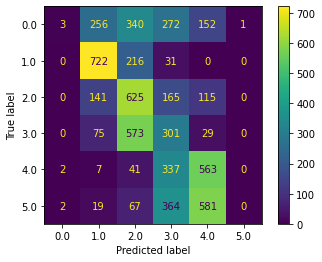

confusion_matrix for train dataset:


KeyboardInterrupt: 

In [20]:
from sklearn import tree
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
def decision_tree_method(best_depth , min_split , X_train , Y_train , X_test , Y_test):
    print("best_depth =", best_depth, "and min_samples_split =", min_split)
    reg = tree.DecisionTreeRegressor(max_depth = best_depth , min_samples_split = min_split)
    reg = reg.fit(X_train, Y_train)
    test_predict = reg.predict(X_test)
    train_predict = reg.predict(X_train)
    test_cm = confusion_matrix(Y_test , np.round(abs(test_predict)))
    print("confusion_matrix for test dataset:")
    clf = SVC(random_state=0)
    clf.fit(X_test, Y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()
    train_cm = confusion_matrix(Y_train , np.round(abs(train_predict)))
    print("confusion_matrix for train dataset:")
    clf = SVC(random_state=0)
    clf.fit(X_train, Y_train)
    disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()
    test_accuracy = (test_cm[0][0] + test_cm[1][1])/(test_cm[0][0]+ test_cm[0][1]+ test_cm[1][0]+ test_cm[1][1])*100
    train_accuracy = (train_cm[0][0] + train_cm[1][1])/(train_cm[0][0]+ train_cm[0][1]+ train_cm[1][0]+ train_cm[1][1])*100
    print("* accuracy of test dataset is:", test_accuracy)
    print("* accuracy of train dataset is:", train_accuracy)
    print("-------------------------------------------------")

decision_tree_method(6 , 12 , X_train , Y_train , X_test , Y_test)

<b>Confusion Matrix:</b> The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without normalization by class support size (number of elements in each class). This kind of normalization can be interesting in case of class imbalance to have a more visual interpretation of which class is being misclassified.

* <b>max_depth</b> is maximum depth of the tree if we don't assign a value to it then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. It's for knowing until what point we should continue to produce nodes. The theoretical maximum depth a decision tree can achieve is one less than the number of training samples, but no algorithm will let you reach this point for obvious reasons, one big reason being overfitting.
* <b>min_samples_split</b> is the minimum number of samples required to split an internal node while min_samples_leaf specifies the minimum number of samples required to be at a leaf node. For instance, if min_samples_split = 5 , and there are 7 samples at an internal node, then the split is allowed.. It's for determining the label at the end meaning that if the number of remaining samples in the node is less than this value we'll determine the label for that node and stop producing nodes. 
* <b>Overfitting</b> usually takes place when a model has an excessively complex structure and learns both the existing relations among data and noise. Such models often have bad generalization capabilities. Although they work well with training data, they usually yield poor performance with unseen (test) data.

In [ ]:
decision_tree_method(1 , 2 , X_train , Y_train , X_test , Y_test)
decision_tree_method(3 , 2 , X_train , Y_train , X_test , Y_test)
decision_tree_method(5 , 2 , X_train , Y_train , X_test , Y_test)
decision_tree_method(7 , 2 , X_train , Y_train , X_test , Y_test)
decision_tree_method(10 , 2 , X_train , Y_train , X_test , Y_test)

In [ ]:
decision_tree_method(5 , 5 , X_train , Y_train , X_test , Y_test)
decision_tree_method(5 , 35 , X_train , Y_train , X_test , Y_test)
decision_tree_method(5 , 135 , X_train , Y_train , X_test , Y_test)

### Question 1:
After reading some documents online I came to the understanding that 10% to 30% is a good percentage for test size and by experimenting different values I decided to use the value 20%.

In [ ]:
X_train_98, X_test_98, Y_train_98, Y_test_98 = train_test_split(X , Y , test_size = 0.02 , random_state = 42)
decision_tree_method(5 , 12 , X_train_98 , Y_train_98 , X_test_98 , Y_test_98)

In [ ]:
X_train_40, X_test_40, Y_train_40, Y_test_40 = train_test_split(X , Y , test_size = 0.60 , random_state = 42)
decision_tree_method(5 , 12 , X_train_40 , Y_train_40 , X_test_40 , Y_test_40)

On 98 percent model perform better on test. In 98 percent the train set is much bigger than test set this will result in overfitting since the model will understand everything about train set and it'll be complex. But in 40 percent the train set is smaller than test set this will result in underfitting since the model doesn't train really well and it's much simpler than the previous one.We can observe that in 40 percent train size the train results are better than test results meaning that model performs well on train set but not as good on test set. 

### Question 2:
If we use a large max_depth value it'll make the model more complex meaning that there's higher chance of overfitting and  will make the training process take a long time but if we use a small max_depth value it'll make the model simpler and will give us the result quickly meaning that there's higher chance of underfitting and here's the age old tradeoff between simplicity and consistency we have to check which value generates the best result for our model.

In [ ]:
def decision_tree_tuning(X_train , Y_train , X_test , Y_test):
    train_acc = []
    test_acc = []
    best_max_depth = -1
    best_min_samples_split = -1
    max_acc = float("-inf")
    l = [2, 5, 6, 11, 12]
    for j in l:
        print("min_samples_split =", j)
        for i in list(range(1 , 40)):
            DT = tree.DecisionTreeRegressor(max_depth = i , min_samples_split = j)
            DT = DT.fit(X_train, Y_train)
            test_predict = DT.predict(X_test)
            train_predict = DT.predict(X_train)
            train_acc.append(float((accuracy_score(Y_train, np.round(abs(train_predict)))) * 100))
            test_acc.append(float((accuracy_score(Y_test, np.round(abs(test_predict)))) * 100))
            if(float((accuracy_score(Y_test, np.round(abs(test_predict)))) * 100) > max_acc):
                max_acc = float((accuracy_score(Y_test, np.round(abs(test_predict)))) * 100)
                best_max_depth = i
                best_min_samples_split = j
        plt.plot(list(range(1, 40)), test_acc, label='Test')
        plt.plot(list(range(1, 40)), train_acc, label='Train')
        plt.ylabel('accuracy')
        plt.xlabel('Depth')
        plt.title('Decision Tree')
        plt.legend()
        plt.show()
        test_acc.clear()
        train_acc.clear()   
    print("Best possible max_depth: " + str(best_max_depth))
    print("Best possible min_samples_split: " + str(best_min_samples_split))
    print("Best possible accuracy: " + str(max_acc))

print("test_size = 0.20\n")
decision_tree_tuning(X_train , Y_train , X_test , Y_test)

In [ ]:
print("test_size = 0.02\n")
decision_tree_tuning(X_train_98 , Y_train_98 , X_test_98 , Y_test_98)

In [ ]:
print("test_size = 0.60\n")
decision_tree_tuning(X_train_40 , Y_train_40 , X_test_40 , Y_test_40)

## Phase 3: Prediction using group learning
Random Forest is one of the most popular and most powerful machine learning algorithms. It is a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging.
* <b>bootstrap</b> method for estimating statistical quantities from samples. The Bootstrap Aggregation algorithm for creating multiple different models from a single training dataset. Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
* <b>max_depth</b> is the maximum depth of the tree if the value is too high it can take a really long time to get the results and the model will be really complex also other issues like overfitting can happen.
* <b>min_samples_split:</b> The minimum number of samples required to split an internal node
* <b>n_estimators</b> is the number of trees in the forest and get results from all of them and finally determine the result based on them. Raising this value will result in larger number of trees so we can create a more robust aggregate model with less variance at the cost of a greater training time.
* <b>max_samples:</b> If bootstrap is True, the number of samples to draw from X to train each base estimator.
* <b>max_features</b> is the number of features to consider when looking for the best split meaning that it'll choose a portion of the features based on the set value. This was the game changer and decreased RMSE the most. A small value which means less features considered when splitting at each node will reduce the variance at the cost of higher individual tree bias. High value will obviously have inversed results.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def random_forest_method(best_depth ,min_split , X_train , Y_train , X_test , Y_test, _n_estimators, _max_samples, _max_features):
    print("best_depth =", best_depth, "and min_samples_split =", min_split, "and n_estimators =", _n_estimators, "and max_samples =", _max_samples, "and max_features =", _max_features )
    reg = RandomForestRegressor(bootstrap = True, max_depth = best_depth , n_estimators = _n_estimators , max_samples = _max_samples, max_features = _max_features , min_samples_split = min_split)
    reg = reg.fit(X_train, Y_train)
    test_predict = reg.predict(X_test)
    train_predict = reg.predict(X_train)
    test_cm = confusion_matrix(Y_test , np.round(abs(test_predict)))
    print("confusion_matrix for test:", test_cm)
    train_cm = confusion_matrix(Y_train , np.round(abs(train_predict)))
    print("confusion_matrix for train:", train_cm)
    test_accuracy = (test_cm[0][0] + test_cm[1][1])/(test_cm[0][0]+ test_cm[0][1]+ test_cm[1][0]+ test_cm[1][1])*100
    train_accuracy = (train_cm[0][0] + train_cm[1][1])/(train_cm[0][0]+ train_cm[0][1]+ train_cm[1][0]+ train_cm[1][1])*100
    print("* accuracy of test dataset is:", test_accuracy)
    print("* accuracy of train dataset is:", train_accuracy)
    print("-------------------------------------------------")

random_forest_method(7, 10, X_train , Y_train , X_test , Y_test, 200, 5000, 0.4)
random_forest_method(6, 10, X_train , Y_train , X_test , Y_test, 20, 5000, 0.4)
random_forest_method(12, 10, X_train , Y_train , X_test , Y_test, 20, 5000, 0.4)
random_forest_method(12, 10, X_train , Y_train , X_test , Y_test, 200, 5000, 0.4)

In [ ]:
def random_forest_tuning(X_train , Y_train , X_test , Y_test):
    train_acc = []
    test_acc = []
    best_max_depth = -1
    best_min_samples_split = -1
    best_n_estimators = -1
    best_max_features = -1
    max_acc = float("-inf")
    l = [2, 5, 6, 11, 12]
    ne = [10,20,200]
    mf = [0.2, 0.4, 0.6]
    for f in mf:
        for k in ne:
            for j in l:
                print("min_samples_split =", j, "and n_estimators =", k, "and max_features =", f)
                for i in list(range(1 , 40)):
                    RF = RandomForestRegressor(max_depth = i, min_samples_split = j , n_estimators = k , max_features = f)
                    RF = RF.fit(X_train, Y_train)
                    test_predict = RF.predict(X_test)
                    train_predict = RF.predict(X_train)
                    train_acc.append(float((accuracy_score(Y_train, np.round(abs(train_predict)))) * 100))
                    test_acc.append(float((accuracy_score(Y_test, np.round(abs(test_predict)))) * 100))
                    if(float((accuracy_score(Y_test, np.round(abs(test_predict)))) * 100) > max_acc):
                        max_acc = float((accuracy_score(Y_test, np.round(abs(test_predict)))) * 100)
                        best_max_depth = i
                        best_min_samples_split = j
                        best_n_estimators = k
                        best_max_features = f
                plt.plot(list(range(1, 40)), test_acc, label='Test')
                plt.plot(list(range(1, 40)), train_acc, label='Train')
                plt.ylabel('accuracy')
                plt.xlabel('Depth')
                plt.title('Random Forest')
                plt.legend()
                plt.show()
                test_acc.clear()
                train_acc.clear()   
    print("Best possible max_depth: " + str(best_max_depth))
    print("Best possible min_samples_split: " + str(best_min_samples_split))
    print("Best possible n_estimators: " + str(best_n_estimators))
    print("Best possible max_features: " + str(best_max_features))
    print("Best possible accuracy: " + str(max_acc))

print("test_size = 0.20\n")
random_forest_tuning(X_train , Y_train , X_test , Y_test)

Decision trees are very easy as compared to the random forest. A decision tree combines some decisions, whereas a random forest combines several decision trees. Thus, it is a long process, yet slow.
Whereas, a decision tree is fast and operates easily on large data sets, especially the linear one. The random forest model needs rigorous training.
It depends on your requirements. If you have less time to work on a model, you are bound to choose a decision tree. However, stability and reliable predictions are in the basket of random forests. 

<b>Bias:</b> is difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data. So when bias is high it'll mean that our model is simple so it'll result in underfitting

<b>Variance:</b> is variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data. So when variance is high it'll mean that model is too complex and also performs better on train set rather than test set so it'll result in overfitting

From bias point of view since random forest gets info from several trees there's small chance of underfitting so it'll be better and perform better. Form variance point of view decision trees are prone to overfitting especially when a tree is particularly deep but random forest rarely overfits so in this case is better too so it'll perform better.

All in all since random forest gets information from multiple trees and basically consults and take a look at each of the trees' results before making a decision it'll have better results. One way Random Forests reduce variance is by training on different samples of the data. A second way is by using a random subset of features that we used here in the project as well. In random forest if we use many trees in our forest, eventually many or all of our features will have been included. This inclusion of many features will help limit our error due to bias and error due to variance. The achieved results clearly show that random forest performs better.